# Проект: Обучение с учителем: качество модели

**Описание проекта**

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Цель проекта:**
Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Описание данных:**
* market_file.csv - 
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
    * id — номер покупателя в корпоративной базе данных.
    * Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
    * Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
    * Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
    * Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
    * Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
    * Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
    * Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
    * Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
    * Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
    * Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
    * Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
    * Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
* market_money.csv - 
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
    * id — номер покупателя в корпоративной базе данных.
    * Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
    * Выручка — сумма выручки за период.
* market_time.csv - 
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
    * id — номер покупателя в корпоративной базе данных.
    * Период — название периода, во время которого зафиксировано общее время.
минут — значение времени, проведённого на сайте, в минутах.
* money.csv - 
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
    * id — номер покупателя в корпоративной базе данных.
    * Прибыль — значение прибыли.

**План работы:**
* Загрузим данные
* Проведем предобработку данных
* Проведем исследовательский анализ данных
* Объединим таблицы
* Проведем корреляционный анализ данных
* Подготовим и используем пайплайны
* Проведем анализ важности признаков
* Проведем сегментацию покупателей
* Сделаем выводы

## Загрузка необходимых библиотек

In [948]:
import pandas as pd
!pip install -q imblearn
!pip install -q phik
!pip install -q scikit-learn
!pip install -q shap
!pip install -q optuna
!pip install -q optuna.integration
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler, LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,roc_auc_score, roc_curve, auc, confusion_matrix, recall_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from optuna import distributions
from optuna.integration import OptunaSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from scipy import stats as st
import math
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
import warnings
from optuna.exceptions import ExperimentalWarning
import optuna
import shap
# Зададим константы 
RANDOM_STATE = 42
TEST_SIZE = 0.25

##  Загрузка данных

In [949]:
try: 
    market_file = pd.read_csv('/datasets/market_file.csv',sep=',', decimal=';')
    market_money = pd.read_csv('/datasets/market_money.csv',sep=',', decimal=';')
    market_time = pd.read_csv('/datasets/market_time.csv',sep=',', decimal=';')
    money = pd.read_csv('/datasets/money.csv',sep=';', decimal=',')
except:
    market_file = pd.read_csv('market_file.csv',sep=',', decimal=';')
    market_money = pd.read_csv('market_money.csv',sep=',', decimal=';')
    market_time = pd.read_csv('market_time.csv',sep=',', decimal=';')
    money = pd.read_csv('money.csv',sep=',', decimal=';')

###   Просмотрим данные 

In [950]:
def df_info(df): #Создадим функцию, которая позволит просмотреть информацию о данных
    display(df.head())
    print('Общая информация')
    display(df.info())
    display(df.describe().T)
    print('Выведем количество пропусков и явных дубликтов')
    display((df.isna().mean() * 100).sort_values(ascending=False))
    print('Количество явных дубликатов:')
    display(df.duplicated().sum())
    display(df.shape)

In [951]:
df_info(market_file)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id                                   1300 non-null   int64 
 1   Покупательская активность            1300 non-null   object
 2   Тип сервиса                          1300 non-null   object
 3   Разрешить сообщать                   1300 non-null   object
 4   Маркет_актив_6_мес                   1300 non-null   object
 5   Маркет_актив_тек_мес                 1300 non-null   int64 
 6   Длительность                         1300 non-null   int64 
 7   Акционные_покупки                    1300 non-null   object
 8   Популярная_категория                 1300 non-null   object
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64 
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64 
 11  Ошибка_сервиса            

None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.5,216322.25,216647.0
Маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.0,4.00,5.0
Длительность,1300.0,601.898462,249.856289,110.0,405.50,606.0,806.00,1079.0
Средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.0,4.00,6.0
Неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.0,4.00,10.0
Ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.0,6.00,9.0
Страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.0,11.00,20.0


Выведем количество пропусков и явных дубликтов


id                                     0.0
Покупательская активность              0.0
Тип сервиса                            0.0
Разрешить сообщать                     0.0
Маркет_актив_6_мес                     0.0
Маркет_актив_тек_мес                   0.0
Длительность                           0.0
Акционные_покупки                      0.0
Популярная_категория                   0.0
Средний_просмотр_категорий_за_визит    0.0
Неоплаченные_продукты_штук_квартал     0.0
Ошибка_сервиса                         0.0
Страниц_за_визит                       0.0
dtype: float64

Количество явных дубликатов:


0

(1300, 13)

In [952]:
df_info(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       3900 non-null   int64 
 1   Период   3900 non-null   object
 2   Выручка  3900 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.5+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,3900.0,215997.5,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0


Выведем количество пропусков и явных дубликтов


id         0.0
Период     0.0
Выручка    0.0
dtype: float64

Количество явных дубликатов:


0

(3900, 3)

In [953]:
df_info(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,2600.0,215997.500000,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
минут,2600.0,13.336154,4.080198,4.0,10.00,13.0,16.00,23.0


Выведем количество пропусков и явных дубликтов


id        0.0
Период    0.0
минут     0.0
dtype: float64

Количество явных дубликатов:


0

(2600, 3)

In [954]:
df_info(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.00,215672.75,215997.500,216322.25,216647.00
Прибыль,1300.0,3.996631,1.013722,0.86,3.30,4.045,4.67,7.43


Выведем количество пропусков и явных дубликтов


id         0.0
Прибыль    0.0
dtype: float64

Количество явных дубликатов:


0

(1300, 2)

**Общий вывод по данным:**
* Датафрейм market_file:
    * Состоит из 1300 строк и 13 столбцов
    * Пропуски не обнаружены
    * Явные дубликаты отсутствуют
    * **Стоит поменять названия столбцов и привести их к одному стилю**
    * **Маркет_актив_6_меc,Акционные_покупки тип данных не соответствует для данных столбцов**
* Датафрейм market_money:
    * Состоит из 3900 строк и 3 столбцов
    * Пропуски не обнаружены
    * Явные дубликаты отсутствуют
    * Названия столбцов в порядке
    * **Стоит поменять тип данных для столбца 'Выручка'**
* Датафрейм market_time:
    * Состоит из 2600 строк и 3 столбцов
    * Пропуски не обнаружены
    * Явные дубликаты отсутствуют
    * С типами данных все в порядке
    * **Название столбца 'минут' следует поменять,а также исправить ошибку в слове предыдущий**
* Датафрейм money:
    * Состоит из 1300 строк и 2 столбцов
    * Пропуски не обнаружены
    * Явные дубликаты отсутствуют
    * Названия столбцов в порядке
    * **Тип данных для столбца 'Прибыль' стоит поменять на float64** 

## Предобработка данных

### Поменяем названия столбцов:

In [955]:
market_file.rename(columns={
    'Покупательская активность':'Покупательская_активность',
    'Тип сервиса':'Тип_сервиса',
    'Разрешить сообщать':'Разрешить_сообщать'
},inplace=True
                  )
market_time.rename(columns={'минут':'Минут'},inplace=True)
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')
#Проверим названия
display(market_file.head(1))
display(market_time.head(1))
display(market_time['Период'].unique)

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5


,id,Период,Минут
0,215348,текущий_месяц,14


<bound method Series.unique of 0          текущий_месяц
1       предыдущий_месяц
2          текущий_месяц
3       предыдущий_месяц
4          текущий_месяц
              ...       
2595       текущий_месяц
2596    предыдущий_месяц
2597       текущий_месяц
2598       текущий_месяц
2599    предыдущий_месяц
Name: Период, Length: 2600, dtype: object>

### Изменим тип данных для датафреймов:

In [956]:
market_file['Маркет_актив_6_мес'] = market_file['Маркет_актив_6_мес'].astype(float)
market_file['Акционные_покупки'] = market_file['Акционные_покупки'].astype(float)
market_money['Выручка'] = market_money['Выручка'].astype(str)
market_money['Выручка'] = market_money['Выручка'].str.replace(',', '.', regex=False)
market_money['Выручка'] = market_money['Выручка'].astype(float)
money['Прибыль'] = money['Прибыль'].astype(str)
money['Прибыль'] = money['Прибыль'].str.replace(',', '.', regex=False)
money['Прибыль'] = money['Прибыль'].astype(float)
display(market_file.dtypes)
display(market_money.dtypes)
display(money.dtypes)

id                                       int64
Покупательская_активность               object
Тип_сервиса                             object
Разрешить_сообщать                      object
Маркет_актив_6_мес                     float64
Маркет_актив_тек_мес                     int64
Длительность                             int64
Акционные_покупки                      float64
Популярная_категория                    object
Средний_просмотр_категорий_за_визит      int64
Неоплаченные_продукты_штук_квартал       int64
Ошибка_сервиса                           int64
Страниц_за_визит                         int64
dtype: object

id           int64
Период      object
Выручка    float64
dtype: object

id           int64
Прибыль    float64
dtype: object

### Проверим неявные дубликаты

In [957]:
display(market_file['Тип_сервиса'].unique())
display(market_file['Разрешить_сообщать'].unique())
display(market_file['Популярная_категория'].unique())
display(market_money['Период'].unique())

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

array(['да', 'нет'], dtype=object)

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

В датафрейме market_file в столбце тип сервиса есть неявный дубликат 'стандартт'. Стоит обработать:

In [958]:
market_file['Тип_сервиса'] = market_file['Тип_сервиса'].replace('стандартт', 'стандарт')
market_file['Тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

### Вывод по предобработке данных

* Поменяли названия столбцов
* Изменили тип данных для столбцов датафреймов
* Выявили неявные дубликаты и устранили их
* **Данные готовы к работе!**

##  Исследовательский анализ данных

Отберем таких клиентов,чья покупательская активность не менее трех месяцев, то есть таких, которые совершали какие-либо покупки в этот период.

Выделим колличественные и категориальные признаки для каждого из датасетов:
* Датасет market_file:
    * Колличественные:  маркет актив 6 мес; маркет актив тек мес; длительность; акционные покупки; средний просмотр категорий за визит; неоплаченные продукты штук квартал; ошибка сервиса; страниц за визит.
    * Категориальные: покупательская активность, тип сервиса, разрешить сообщать, популярная категория
* Датасет market_money:
    * Колличественные: выручка
    * Категориальные: период
* Датасет market_time:
    * Колличественные: минут
    * Категориальные: период
* Датасет money:
    * Колличественные: прибыль

### Начнем с датасета market_file:

####  Маркет_актив_6_мес

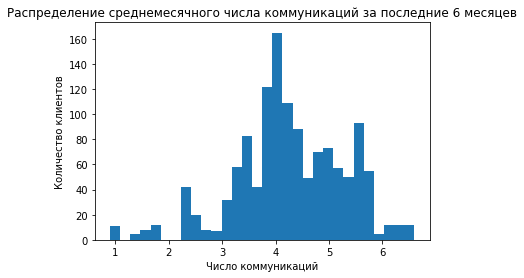

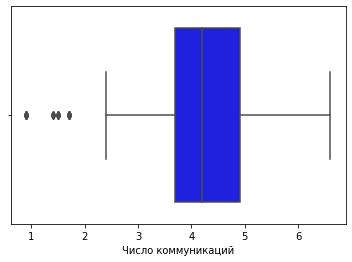

In [959]:
market_file['Маркет_актив_6_мес'].plot(kind='hist',bins = 30)
plt.xlabel('Число коммуникаций')
plt.ylabel('Количество клиентов')
plt.title('Распределение среднемесячного числа коммуникаций за последние 6 месяцев')
plt.show()
sns.boxplot(x=market_file['Маркет_актив_6_мес'], color='blue')
plt.xlabel('Число коммуникаций')
plt.show()

Рассматривая гистограмму,можно предположить почти равномерное распределение со смещением вправо,проблема в хвостах на графиках.

#### Маркет_актив_тек_мес

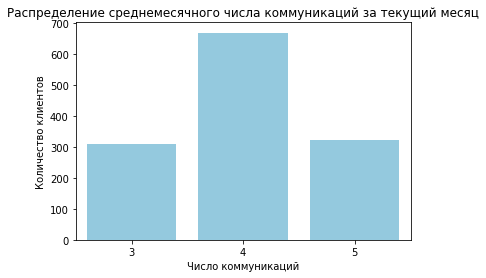

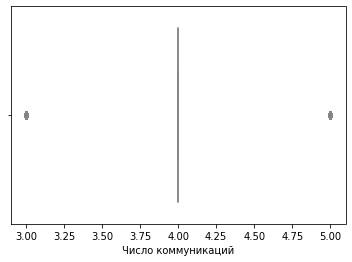

In [960]:
sns.countplot(data=market_file, x='Маркет_актив_тек_мес', color='skyblue')
plt.xlabel('Число коммуникаций')
plt.ylabel('Количество клиентов')
plt.title('Распределение среднемесячного числа коммуникаций за текущий месяц')
plt.show()
sns.boxplot(x=market_file['Маркет_актив_тек_мес'], color='pink')
plt.xlabel('Число коммуникаций')
plt.show()

По графику видим пик у значения 4, оно же и является модой, распределение похоже на нормальное, но при этом есть дисбаланс между значениями 3 и 5

####  Длительность

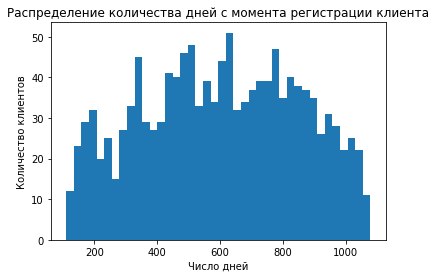

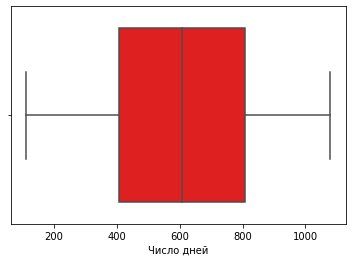

In [961]:
market_file['Длительность'].plot(kind='hist',bins = 40)
plt.xlabel('Число дней')
plt.ylabel('Количество клиентов')
plt.title('Распределение количества дней с момента регистрации клиента')
plt.show()
sns.boxplot(x=market_file['Длительность'], color='red')
plt.xlabel('Число дней')
plt.show()

Рапределение похоже на равномерное, по графику ящика с усами все значения находятся в допустимых пределах,такое распределение может быть связано с тем,что каждый день на сайте регистрируется примерно одинакое количество клиентов

####  Акционные покупки

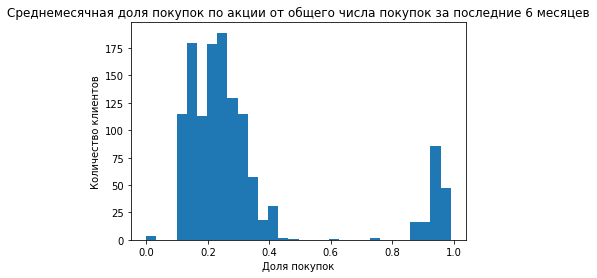

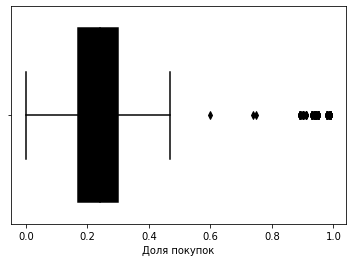

In [962]:
market_file['Акционные_покупки'].plot(kind='hist',bins = 30)
plt.xlabel('Доля покупок')
plt.ylabel('Количество клиентов')
plt.title('Среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев')
plt.show()
sns.boxplot(x=market_file['Акционные_покупки'], color='black')
plt.xlabel('Доля покупок')
plt.show()

Судя по графикам, в данных дисбаланс,у большинства клиентов доля акционных покупок составляет 0.1-0.4 и 0.8-1, видимо клиенты у которых доля акционных покупок 0,8-1 покупают только один товар и только по акции. Судя по графикам, в данных дисбаланс,у большинства клиентов доля акционных покупок составляет 0.1-0.4 и 0.8-1, видимо клиенты у которых доля акционных покупок 0,8-1 покупают только один товар и только по акции. 

####  Средний просмотр категорий за визит

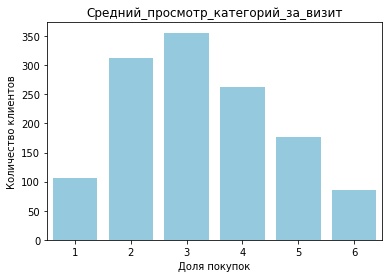

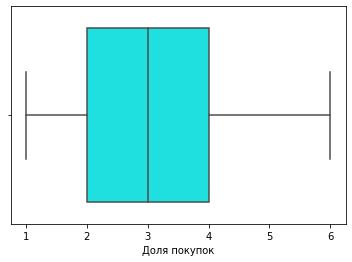

In [963]:
sns.countplot(data=market_file, x='Средний_просмотр_категорий_за_визит', color='skyblue')
plt.xlabel('Доля покупок')
plt.ylabel('Количество клиентов')
plt.title('Средний_просмотр_категорий_за_визит')
plt.show()
sns.boxplot(x=market_file['Средний_просмотр_категорий_за_визит'], color='cyan')
plt.xlabel('Доля покупок')
plt.show()

Распределение похоже на нормальное

####  Неоплаченные_продукты_штук_квартал

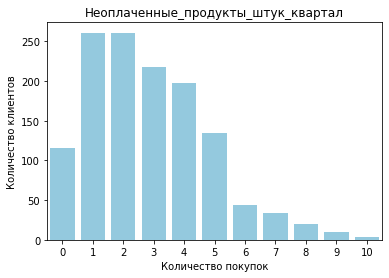

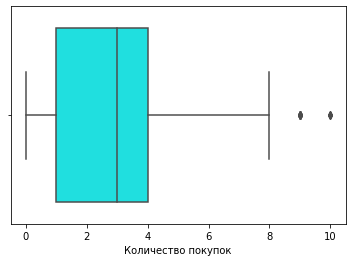

In [964]:
sns.countplot(data=market_file, x='Неоплаченные_продукты_штук_квартал', color='skyblue')
plt.xlabel('Количество покупок')
plt.ylabel('Количество клиентов')
plt.title('Неоплаченные_продукты_штук_квартал')
plt.show()
sns.boxplot(x=market_file['Неоплаченные_продукты_штук_квартал'], color='cyan')
plt.xlabel('Количество покупок')
plt.show()

Похоже на равномерное распределение со смещением влево,оставим все как есть

####  Ошибка сервиса

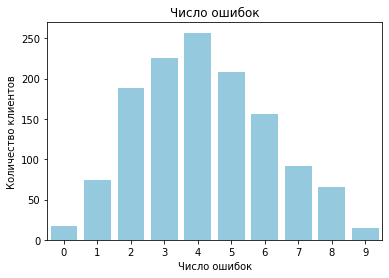

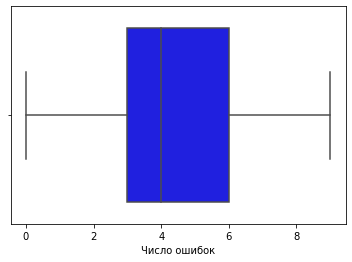

In [965]:
sns.countplot(data=market_file, x='Ошибка_сервиса', color='skyblue')
plt.xlabel('Число ошибок')
plt.ylabel('Количество клиентов')
plt.title('Число ошибок')
plt.show()
sns.boxplot(x=market_file['Ошибка_сервиса'], color='blue')
plt.xlabel('Число ошибок')
plt.show()

Распределение очень похоже на нормальное, с данными все хорошо

####  Страниц за визит

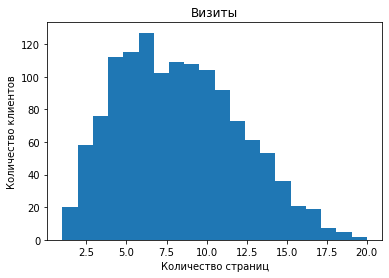

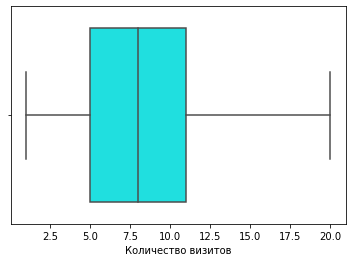

In [966]:
market_file['Страниц_за_визит'].plot(kind='hist',bins = 20)
plt.xlabel('Количество страниц')
plt.ylabel('Количество клиентов')
plt.title('Визиты')
plt.show()
sns.boxplot(x=market_file['Страниц_за_визит'], color='cyan')
plt.xlabel('Количество визитов')
plt.show()

Распределение похоже на нормальное со смещением влево, выбросы отсутствуют.

###  Таблица market_money

####  Выручка

Просмотрим выбросы

In [967]:
market_money['Выручка'].sort_values(ascending=False)

98      106862.2
435       7799.4
262       7605.3
1481      7557.0
2388      7547.8
          ...   
34           0.0
29           0.0
28           0.0
2            0.0
0            0.0
Name: Выручка, Length: 3900, dtype: float64

Можно конечно предположить,что клиент купил товара на 100 000, на всякий случаем проверим прибыль, чтобы выявить аномальное ли это значение

In [968]:
money.query('id == 215380')

,id,Прибыль
32,215380,3.88


Прибыль находится рядом со значением медианны, поэтому можем делать выводы что это аномалия,уберем ее

In [969]:
market_money = market_money.query('Выручка < 100000')

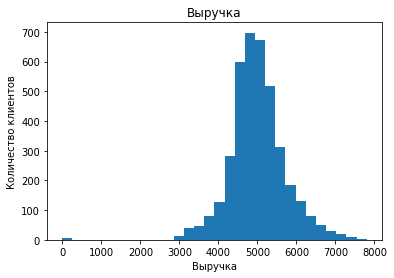

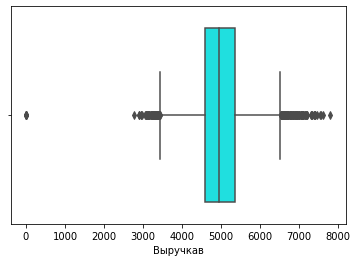

In [970]:
market_money['Выручка'].plot(kind='hist',bins = 30)
plt.xlabel('Выручка')
plt.ylabel('Количество клиентов')
plt.title('Выручка')
plt.show()
sns.boxplot(x=market_money['Выручка'], color='cyan')
plt.xlabel('Выручкав')
plt.show()

Имеется выброс у нуля,но также можно сказать что есть клиенты, которые зарегистрировались на сайте, но не купили ничего.

### Датафрейм market_time

#### Минут

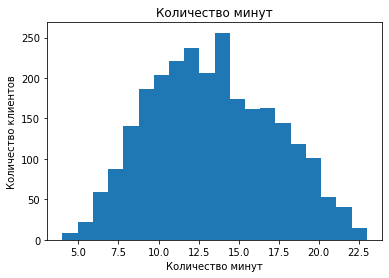

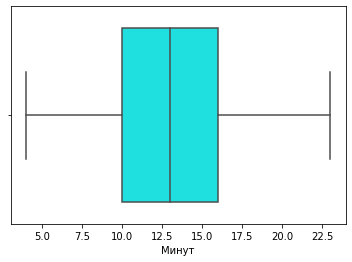

In [971]:
market_time['Минут'].plot(kind='hist',bins = 20)
plt.xlabel('Количество минут')
plt.ylabel('Количество клиентов')
plt.title('Количество минут')
plt.show()
sns.boxplot(x=market_time['Минут'], color='cyan')
plt.xlabel('Минут')
plt.show()

Распределение нормальное,значения находятся в пределах нормы

###  Датафрейм money

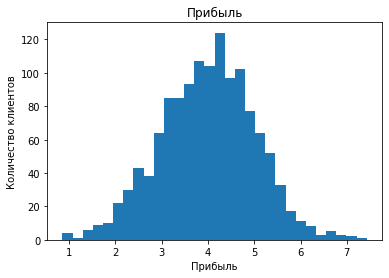

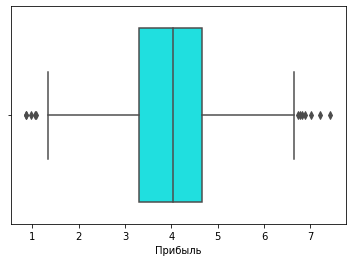

In [972]:
money['Прибыль'].plot(kind='hist',bins = 30)
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов')
plt.title('Прибыль')
plt.show()
sns.boxplot(x=money['Прибыль'], color='cyan')
plt.xlabel('Прибыль')
plt.show()

Распределение похоже на нормально, с данными все хорошо.

###  Датафрейм market_file категориальные признаки

Создадим функцию которая позволит строить графики распределений для признаков

In [973]:
def graph(name, table, ax):
    pivot = table.pivot_table(index=name, values='id', aggfunc='count')
    pivot.columns = ['count']
    pivot.sort_values(by='count', ascending=True, inplace=True)

    return pivot.plot.bar(title=name,ylabel='Количество пользователей',rot=0,ax=ax)

Теперь построим графики для каждого признака

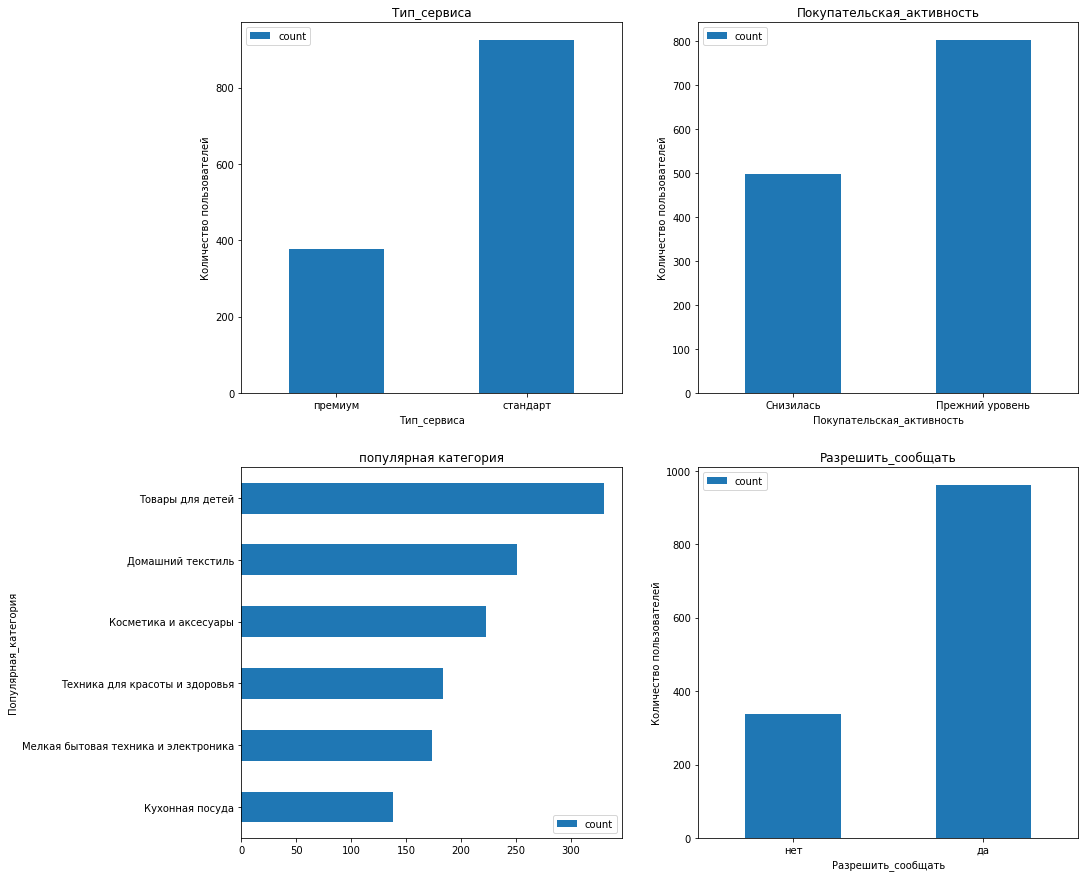

In [974]:
cat_names = ['Покупательская_активность',
                 'Тип_сервиса',
                 'Разрешить_сообщать']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

for i in range(0, 3):
    graph(cat_names[i], market_file, axes[i // 2, 1 - i % 2])

pivot = market_file.pivot_table(index='Популярная_категория', values='id', aggfunc='count')
pivot.columns = ['count']
pivot.sort_values(by='count', ascending=True, inplace=True)

pivot.plot.barh(title='популярная категория',ylabel='Количество пользователей',rot=0,ax=axes[1, 0])
plt.show()

Пользователи, как правило, дают согласие на получение информации об акциях, отдают предпочтение домашнему текстилю и товарам для детей, а также используют стандартную версию сервиса. Основной вывод из графиков заключается в том, что необходимо уделить особое внимание дисбалансу классов целевого признака, связанного с покупательской активностью.

### Датафрейм market_money

Построим графики признака период

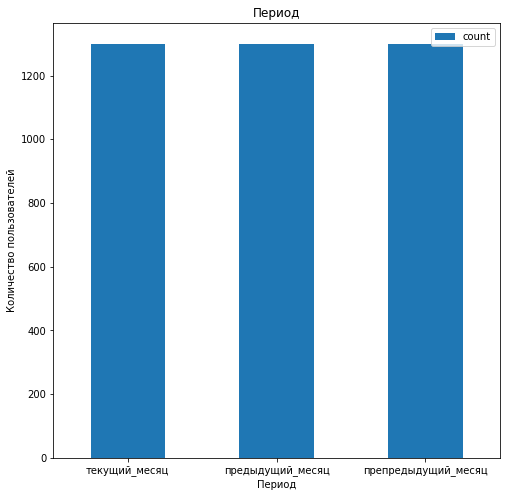

In [975]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
graph('Период', market_money, axes)
plt.show()

Можно сделать выводы, что данные представлены за каждый месяц в одинаковым размером.

###  Датафрейм market_time

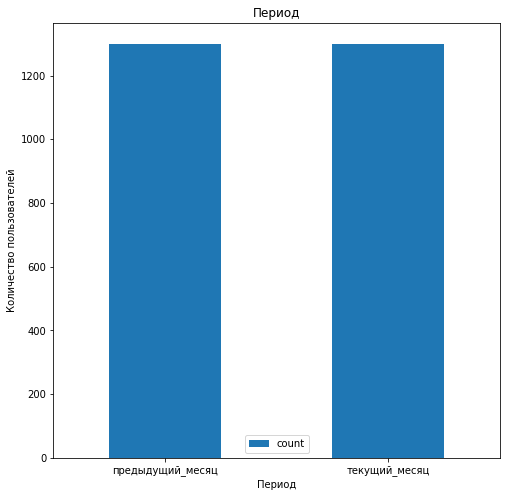

In [976]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
graph('Период', market_time, axes)
plt.show()

Данные также представлены в одинаковом количестве

### Проверим на дисбаланс классов с колличественными признаками

В датафрейме market_file в столбце маркет актив 6 мес,можем предположить дисбаланс классов,проверим это и для этого превратим в категориальные признаки. 
Маркет актив 6 мес категориальный (3,6)- будет иметь значения низкий, средний, высокий при маркет актив 6 мес меньше 3, от 3 до 6, выше 6.
Маркет актив 6 мес категориальный (2,6) - будет иметь значения низкий, средний, высокий при маркет актив 6 мес меньше 2, от 2 до 6, выше 6 

In [977]:
market_file['маркет_актив_6_мес (3,6)'] = market_file['Маркет_актив_6_мес'].apply(
    lambda x : 'низкий' if x < 3 else 'средний' if x <= 6 else 'высокий'
)
market_file['маркет_актив_6_мес (2,6)'] = market_file['Маркет_актив_6_мес'].apply(
    lambda x : 'низкий' if x < 2 else 'средний' if x <= 6 else 'высокий'
)

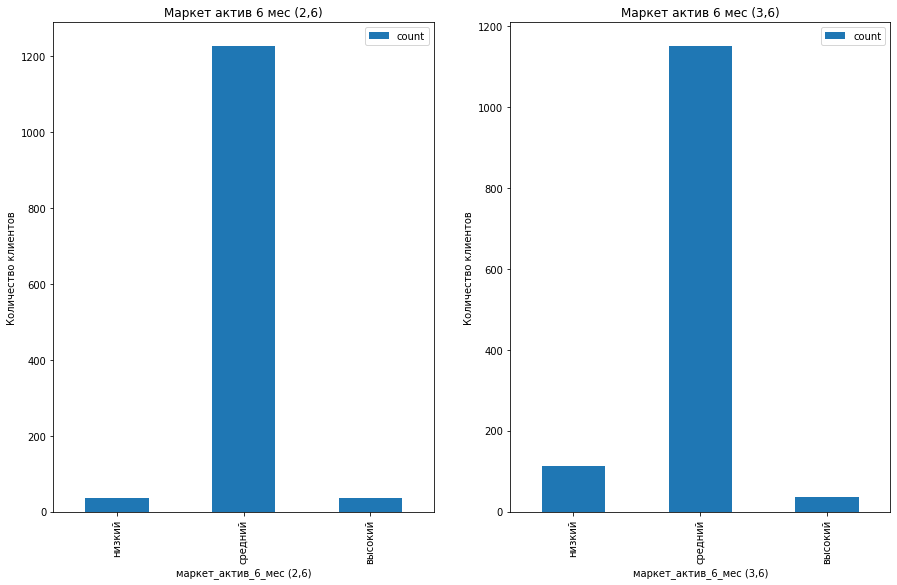

In [978]:
def get_great(val):
    indexers = {
        'низкий': 0,
        'средний': 1,
        'высокий': 2
    }
    return [indexers[idx] for idx in val]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_26 = market_file.pivot_table(index='маркет_актив_6_мес (2,6)', values='id', aggfunc='count')
cat_26.columns = ['count']
cat_26.sort_index(key=get_great, ascending=True, inplace=True)
cat_26.plot.bar(ax=axes[0],
                 title='Маркет актив 6 мес (2,6)',
                 ylabel='Количество клиентов')

cat_36 = market_file.pivot_table(index='маркет_актив_6_мес (3,6)', values='id', aggfunc='count')
cat_36.columns = ['count']
cat_36.sort_index(key=get_great, ascending=True, inplace=True)
cat_36.plot.bar(ax=axes[1],
                 title='Маркет актив 6 мес (3,6)',
                 ylabel='Количество клиентов')
plt.show()

При обучении модели,стоит учесть то, что дисбаланс явный и сильный,средний класс больше иных в несколько раз

Теперь просмотрим столбец маркет_актив_тек_мес.
Предлагаю преобразовать этот количественный признак в категориальный. Для этого создадим категорию "маркет актив тек мес", которая будет иметь следующие значения: "низкий" для значений ниже 3.5, "средний" для значений от 3.5 до 4.5 и "высокий" для значений выше 4.5.

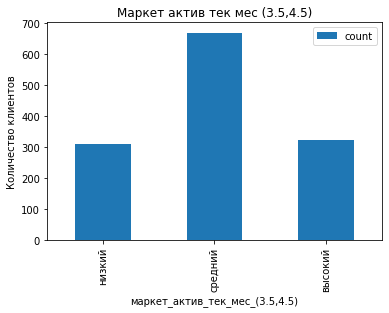

In [979]:
market_file['маркет_актив_тек_мес_(3.5,4.5)'] = market_file['Маркет_актив_тек_мес'].apply(
    lambda x : 'низкий' if x < 3.5 else 'средний' if x <= 4.5 else 'высокий'
)
cat = market_file.pivot_table(index='маркет_актив_тек_мес_(3.5,4.5)', values='id', aggfunc='count')
cat.columns = ['count']
cat.sort_index(key=get_great, ascending=True, inplace=True)

cat.plot.bar(title='Маркет актив тек мес (3.5,4.5)',
                 ylabel='Количество клиентов')

plt.show()

Присутствует дисбаланс классов,также учтем при обучении модели

Рассмотрим акционные покупки на дисбаланс классов. Учтем порок примерно в 0.7,ведь именно после него в данных есть выбросы.

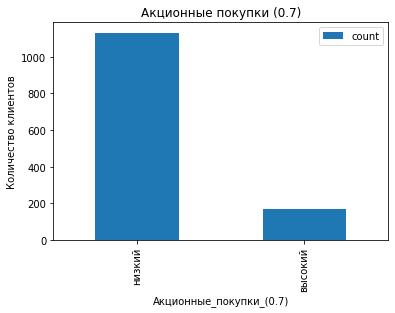

In [980]:
market_file['Акционные_покупки_(0.7)'] = market_file['Акционные_покупки'].apply(
    lambda x : 'низкий' if x < 0.7 else 'высокий'
)
cat = market_file.pivot_table(index='Акционные_покупки_(0.7)', values='id', aggfunc='count')
cat.columns = ['count']
cat.sort_index(key=get_great, ascending=True, inplace=True)

cat.plot.bar(title='Акционные покупки (0.7)',
                 ylabel='Количество клиентов')

plt.show()

Присутствует дисбаланс классов,учтем

Рассмотрим неоплаченные продукты

неоплаченные продукты штук квартал(1,5) - будет иметь значения низкий, средний, высокий при неоплаченные продукты штук квартал меньше 1, от 1 до 5, выше 5 (соответственно),
неоплаченные продукты штук квартал(5)- будет иметь значения низкий, высокий при неоплаченные продукты штук квартал меньше 5 и больше либо равно 5 (соответственно):

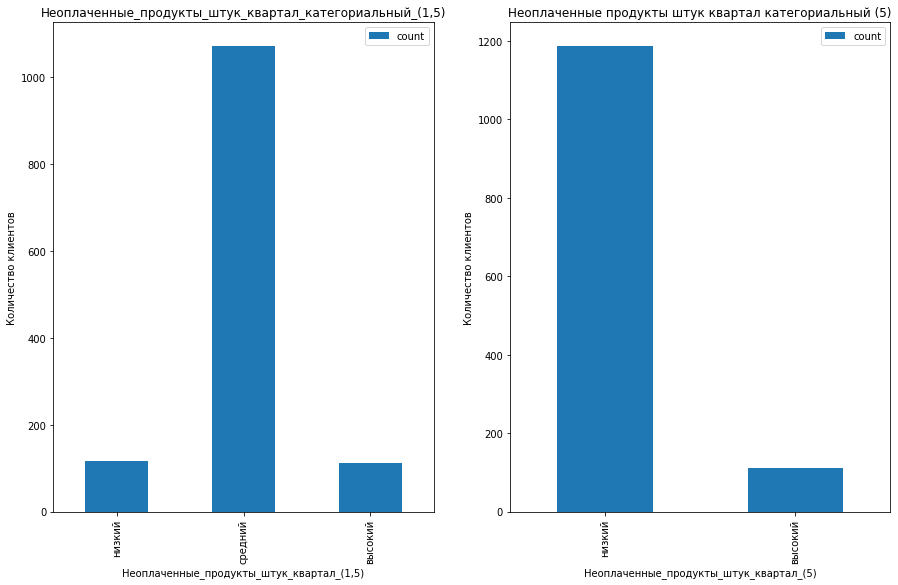

In [981]:
market_file['Неоплаченные_продукты_штук_квартал_(1,5)'] = market_file['Неоплаченные_продукты_штук_квартал'].apply(
    lambda x : 'низкий' if x < 1 else 'средний' if x <= 5 else 'высокий'
)
market_file['Неоплаченные_продукты_штук_квартал_(5)'] = market_file['Неоплаченные_продукты_штук_квартал'].apply(
    lambda x : 'низкий' if x <= 5 else 'высокий'
)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_1_5 = market_file.pivot_table(index='Неоплаченные_продукты_штук_квартал_(1,5)', values='id', aggfunc='count')
cat_1_5.columns = ['count']
cat_1_5.sort_index(key=get_great, ascending=True, inplace=True)

cat_1_5.plot.bar(ax=axes[0],
                 title='Неоплаченные_продукты_штук_квартал_категориальный_(1,5)',
                 ylabel='Количество клиентов')
cat_5 = market_file.pivot_table(index='Неоплаченные_продукты_штук_квартал_(5)', values='id', aggfunc='count')
cat_5.columns = ['count']
cat_5.sort_index(key=get_great, ascending=True, inplace=True)

cat_5.plot.bar(ax=axes[1],
                 title='Неоплаченные продукты штук квартал категориальный (5)',
                 ylabel='Количество клиентов')
plt.show()

Снова сильный дисбаланс,учтем

Просмотрим столбец ошибка сервиса
Снова переведем колличественный признак в категориальный следующим образом:

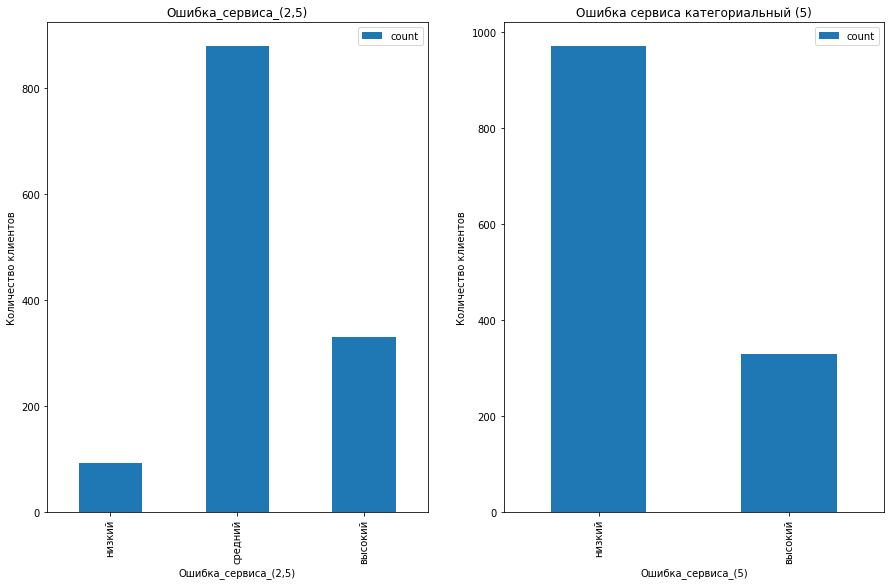

In [982]:
market_file['Ошибка_сервиса_(2,5)'] = market_file['Ошибка_сервиса'].apply(
    lambda x : 'низкий' if x < 2 else 'средний' if x <= 5 else 'высокий'
)
market_file['Ошибка_сервиса_(5)'] = market_file['Ошибка_сервиса'].apply(
    lambda x : 'низкий' if x <= 5 else 'высокий'
)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,9))

cat_25 = market_file.pivot_table(index='Ошибка_сервиса_(2,5)', values='id', aggfunc='count')
cat_25.columns = ['count']
cat_25.sort_index(key=get_great, ascending=True, inplace=True)

cat_25.plot.bar(ax=axes[0],
                 title='Ошибка_сервиса_(2,5)',
                 ylabel='Количество клиентов')

cat_5 = market_file.pivot_table(index='Ошибка_сервиса_(5)', values='id', aggfunc='count')
cat_5.columns = ['count']
cat_5.sort_index(key=get_great, ascending=True, inplace=True)

cat_5.plot.bar(ax=axes[1],
                 title='Ошибка сервиса категориальный (5)',
                 ylabel='Количество клиентов')
plt.show()

Снова дисбаланс классов,учтем.

### Отберем активных пользователей

Создадим дополнительный столбец для понимания активный ли пользователь или нет

In [983]:
active_users = market_money.groupby('id').agg({
    'Выручка': 'prod',  # Применяем prod к столбцу 'выручка'
}).query('Выручка > 0')

Теперь пометим активными тех пользователей, id которых попал в получившуюся таблицу. А также сразу посмотрим неактивных

In [984]:
active_users_idx = list(active_users.index)
market_file['Активность_за_три_месяца'] = market_file['id'].apply(
    lambda x : 'да' if x in active_users_idx else 'нет'
)

Просмотрим неактивных пользователей

In [985]:
market_file[market_file['Активность_за_три_месяца'] == 'нет']

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,...,Страниц_за_визит,"маркет_актив_6_мес (3,6)","маркет_актив_6_мес (2,6)","маркет_актив_тек_мес_(3.5,4.5)",Акционные_покупки_(0.7),"Неоплаченные_продукты_штук_квартал_(1,5)",Неоплаченные_продукты_штук_квартал_(5),"Ошибка_сервиса_(2,5)",Ошибка_сервиса_(5),Активность_за_три_месяца
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,...,5,средний,средний,высокий,низкий,средний,низкий,низкий,низкий,нет
9,215357,Снизилась,стандарт,да,3.9,5,154,0.0,Техника для красоты и здоровья,3,...,5,средний,средний,высокий,низкий,средний,низкий,высокий,высокий,нет
11,215359,Снизилась,стандарт,да,4.6,5,110,0.0,Домашний текстиль,4,...,2,средний,средний,высокий,низкий,средний,низкий,средний,низкий,нет


Всего получилось неактивных пользователей 3,уберем их

In [986]:
market_file = market_file[market_file['Активность_за_три_месяца'] == 'да']
market_file.drop('Активность_за_три_месяца', axis=1, inplace=True)
market_file.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,...,Ошибка_сервиса,Страниц_за_визит,"маркет_актив_6_мес (3,6)","маркет_актив_6_мес (2,6)","маркет_актив_тек_мес_(3.5,4.5)",Акционные_покупки_(0.7),"Неоплаченные_продукты_штук_квартал_(1,5)",Неоплаченные_продукты_штук_квартал_(5),"Ошибка_сервиса_(2,5)",Ошибка_сервиса_(5)
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,2,5,средний,средний,средний,высокий,средний,низкий,средний,низкий
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,1,5,средний,средний,низкий,низкий,средний,низкий,низкий,низкий
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,6,4,средний,средний,высокий,высокий,низкий,низкий,высокий,высокий
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,3,2,средний,средний,низкий,высокий,средний,низкий,средний,низкий
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,...,1,4,средний,средний,средний,низкий,средний,низкий,низкий,низкий


### Вывод
* В ходе исследовательского анализа данных было выявлено:
    * Датафрейм market_file:
        * Маркет_актив_6_мес: можно предположить почти равномерное распределение со смещением вправо,проблема в хвостах на графиках, при обучении модели,стоит учесть то, что дисбаланс явный и сильный,средний класс больше иных в несколько раз.
        * Маркет_актив_тек_мес: По графику видим пик у значения 4, оно же и является модой, распределение похоже на нормальное, но при этом есть дисбаланс между значениями 3 и 5. Присутствует дисбаланс классов,также учтем при обучении модели.
        * Длительность; Рапределение похоже на равномерное, по графику ящика с усами все значения находятся в допустимых пределах,такое распределение может быть связано с тем,что каждый день на сайте регистрируется примерно одинакое количество клиентов
        * Акционные покупки: Судя по графикам, в данных дисбаланс,у большинства клиентов доля акционных покупок составляет 0.1-0.4 и 0.8-1, видимо клиенты у которых доля акционных покупок 0,8-1 покупают только один товар и только по акции. Присутствует дисбаланс классов,учтем
        * Средний просмотр категорий за визит: Распределение похоже на нормальное, дисбаланс отсутствует.
        * Неоплаченные продукты штук за квартал: Похоже на равномерное распределение со смещением влево,оставим все как есть,сильный дисбаланс,учтем
        * Ошибки сервиса: Распределение очень похоже на нормальное, с данными все хорошо
        * Страниц за визит: Распределение похоже на нормальное со смещением влево, выбросы отсутствуют.
        * Категориальные признаки(покупательская активность, тип сервиса, разрешить сообщать, популярная категория): Пользователи, как правило, дают согласие на получение информации об акциях, отдают предпочтение домашнему текстилю и товарам для детей, а также используют стандартную версию сервиса. Основной вывод из графиков заключается в том, что необходимо уделить особое внимание дисбалансу классов целевого признака, связанного с покупательской активностью.
    * Датафрейм market_time:
        *  Минут: Распределение нормальное,значения находятся в пределах нормы
        *  Период: Данные также представлены в одинаковом количестве
    * Датафрейм market_money:
        *  Минут:Имеется выброс у нуля,но также можно сказать что есть клиенты, которые зарегистрировались на сайте, но не купили ничего.
        *  Период: Можно сделать выводы, что данные представлены за каждый месяц в одинаковым размером.
    * Датафрейм money:
        *  Прибыль: Распределение похоже на нормально, с данными все хорошо.
    * Отобрали активных пользователей: Отобрали клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период

##   Объединение таблиц

Сначала сгруппируем таблицы market_time и market_money по периоду:

In [987]:
market_time_grouped = market_time.set_index(['id', 'Период']).unstack()
market_money_grouped = market_money.set_index(['id', 'Период']).unstack()
display(market_money_grouped.head())
display(market_time_grouped.head())   

Выручка                                  
Период предыдущий_месяц препредыдущий_месяц текущий_месяц
id                                                       
215348              0.0                 0.0        3293.1
215349           5216.0              4472.0        4971.6
215350           5457.5              4826.0        5058.4
215351           6158.0              4793.0        6610.4
215352           5807.5              4594.0        5872.5

Минут              
Период предыдущий_месяц текущий_месяц
id                                   
215348               13            14
215349               12            10
215350                8            13
215351               11            13
215352                8            11

In [988]:
# Сбросим мультииндекс
if isinstance(market_time_grouped.columns, pd.MultiIndex):
    market_time_grouped.columns = ['_'.join(map(str, col)) for col in market_time_grouped.columns]

if isinstance(market_money_grouped.columns, pd.MultiIndex):
    market_money_grouped.columns = ['_'.join(map(str, col)) for col in market_money_grouped.columns]

Объединим таблицы

In [989]:
market_df = market_file.merge(market_time_grouped, on='id', how='left').merge(market_money_grouped, on='id', how='left')

In [990]:
market_df.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,...,Акционные_покупки_(0.7),"Неоплаченные_продукты_штук_квартал_(1,5)",Неоплаченные_продукты_штук_квартал_(5),"Ошибка_сервиса_(2,5)",Ошибка_сервиса_(5),Минут_предыдущий_месяц,Минут_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,высокий,средний,низкий,средний,низкий,12,10,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,низкий,средний,низкий,низкий,низкий,8,13,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,высокий,низкий,низкий,высокий,высокий,11,13,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,высокий,средний,низкий,средний,низкий,8,11,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,...,низкий,средний,низкий,низкий,низкий,10,10,4738.5,5124.0,5388.5


Проверим размерность конечной таблицы

In [991]:
print(market_file.shape)
print(market_money_grouped.shape)
print(market_time_grouped.shape)
print(market_df.shape)

(1297, 21)
(1300, 3)
(1300, 2)
(1297, 26)


Отлично,сумма количества начальных таблиц совпадает с количеством столбцов в итоговой.

### Вывод:
Объединили таблицы,дабы удобнее было работать с данными.

##  Корреляционный анализ данных

### Построим матрицу корреляции между признаками

In [992]:
market_df.head()

,id,Покупательская_активность,Тип_сервиса,Разрешить_сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,...,Акционные_покупки_(0.7),"Неоплаченные_продукты_штук_квартал_(1,5)",Неоплаченные_продукты_штук_квартал_(5),"Ошибка_сервиса_(2,5)",Ошибка_сервиса_(5),Минут_предыдущий_месяц,Минут_текущий_месяц,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,высокий,средний,низкий,средний,низкий,12,10,5216.0,4472.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,низкий,средний,низкий,низкий,низкий,8,13,5457.5,4826.0,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,высокий,низкий,низкий,высокий,высокий,11,13,6158.0,4793.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,высокий,средний,низкий,средний,низкий,8,11,5807.5,4594.0,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,...,низкий,средний,низкий,низкий,низкий,10,10,4738.5,5124.0,5388.5


In [993]:
linear_corr_cols = [
    'Маркет_актив_6_мес',
    'Средний_просмотр_категорий_за_визит',
    'Неоплаченные_продукты_штук_квартал',
    'Ошибка_сервиса',
    'Страниц_за_визит',
    'Акционные_покупки_(0.7)',
    'Неоплаченные_продукты_штук_квартал_(1,5)',
    'Неоплаченные_продукты_штук_квартал_(5)',
    'Минут_предыдущий_месяц',
    'Минут_текущий_месяц',
    'Выручка_препредыдущий_месяц',
    'Выручка_текущий_месяц',
    'Тип_сервиса'
]
linear_corr_cols.insert(0, 'Покупательская_активность')
linear_corr_cols.insert(0, 'id')

In [994]:
market_new_df = market_df[linear_corr_cols]
market_new_df.head()

,id,Покупательская_активность,Маркет_актив_6_мес,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Акционные_покупки_(0.7),"Неоплаченные_продукты_штук_квартал_(1,5)",Неоплаченные_продукты_штук_квартал_(5),Минут_предыдущий_месяц,Минут_текущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,Тип_сервиса
0,215349,Снизилась,4.4,4,4,2,5,высокий,средний,низкий,12,10,4472.0,4971.6,премиум
1,215350,Снизилась,4.9,5,2,1,5,низкий,средний,низкий,8,13,4826.0,5058.4,стандарт
2,215351,Снизилась,3.2,5,0,6,4,высокий,низкий,низкий,11,13,4793.0,6610.4,стандарт
3,215352,Снизилась,5.1,3,2,3,2,высокий,средний,низкий,8,11,4594.0,5872.5,стандарт
4,215353,Снизилась,3.3,4,1,1,4,низкий,средний,низкий,10,10,5124.0,5388.5,стандарт


Снова взглянем на матрицу,чтобы провести анализ и выявить есть ли мультиколлианеарность в данных или нет

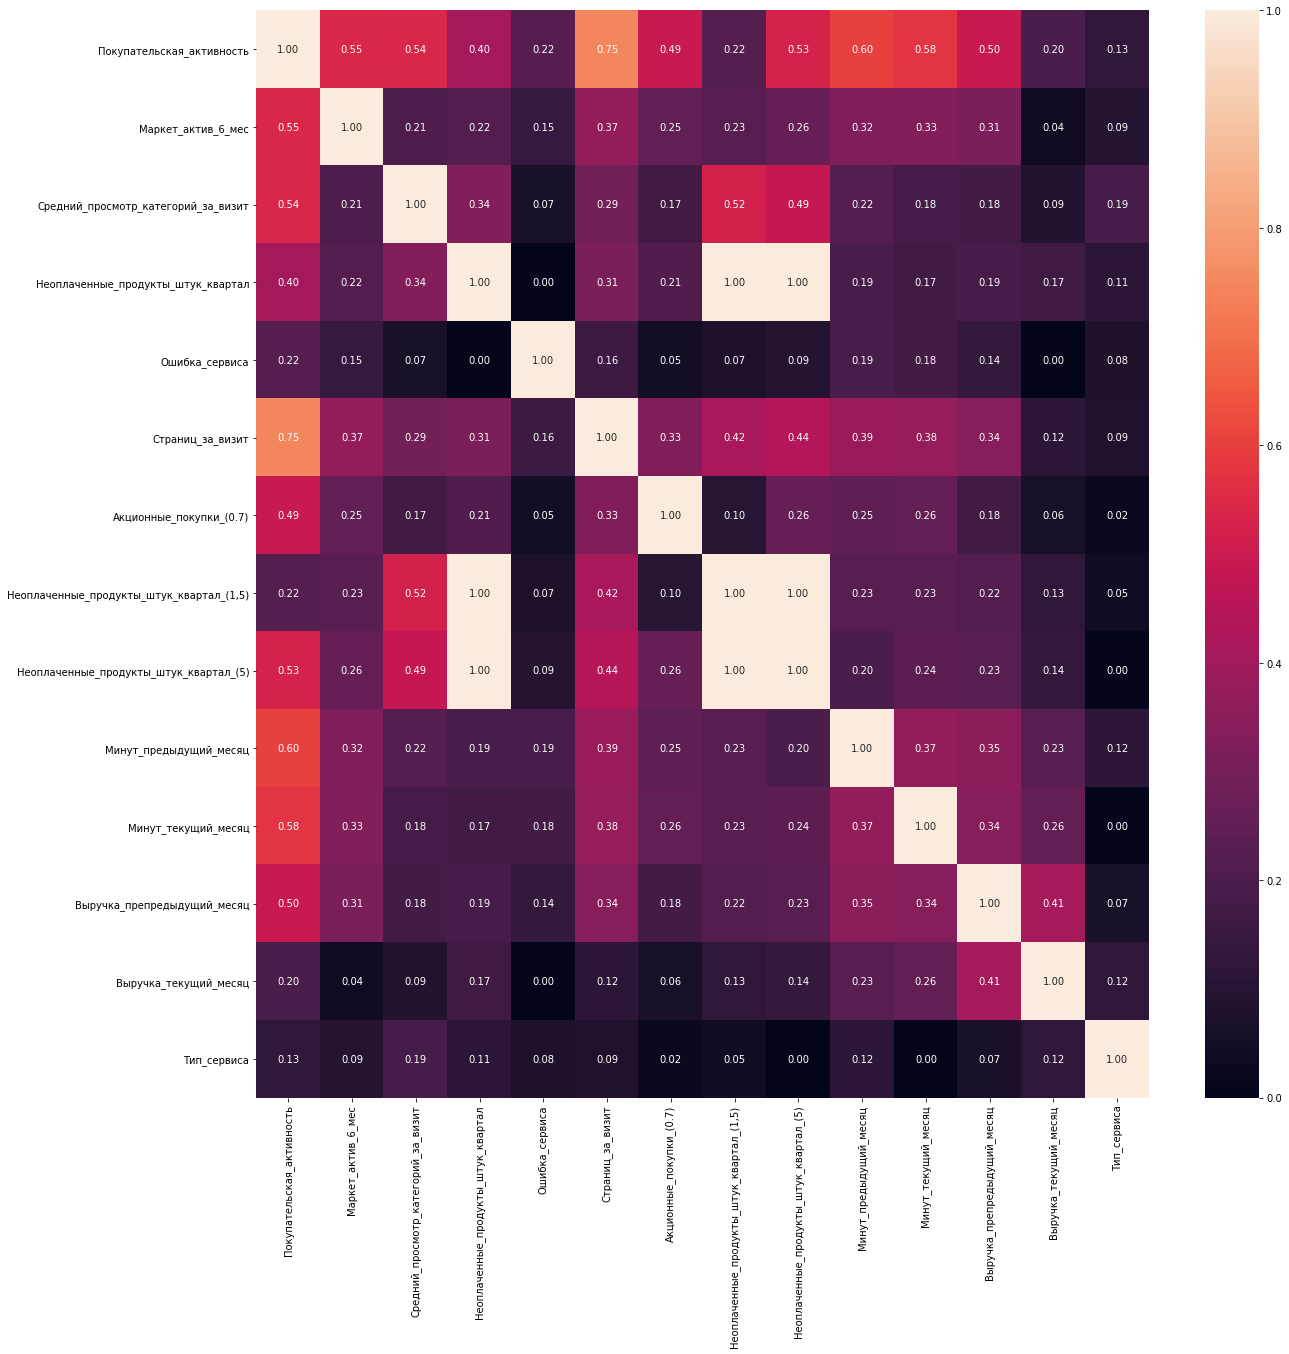

In [995]:
corr_names = {
    'Маркет_актив_6_мес',
    'Акционные_покупки'
    'Минут_предыдущий_месяц',
    'Минут_текущий_месяц',
    'Выручка_предыдущий_месяц',
    'Выручка_препредыдущий_месяц',
    'Выручка_текущий_месяц'
}
plt.figure(figsize=(20, 20))
sns.heatmap(market_new_df.drop('id', axis=1).phik_matrix(interval_cols=corr_names), annot=True, fmt='.2f')
plt.show()

Рассмотрим для начала признаки,коэффицент корреляции которых велик то есть >= 0.7:
* Неоплаченные_продукты_штук_квартал_(1,5) и Неоплаченные_продукты_штук_квартал_(5) - коэффицент корреляции 1
* Неоплаченные продукты штук квартал и неоплаченные продукты штук квартал (1,5) - коэффицент корреляции 0,86
* Неоплаченные продукты штук квартал и неоплаченные продукты штук квартал (5) - коэффицент корреляции 1
* Неоплаченные продукты штук квартал (1,5) и неоплаченные продукты штук квартал (5) - коэффицент корреляции 1
В данном случае столбцы совпали,так как все столбцы так сильно коррелируют друг с другом из за того что буквально содержат такую же информацию, только представленную в категориальной форме.
Поэтому можем их убрать

In [996]:
multicol = [
    'Акционные_покупки_(0.7)',
    'Неоплаченные_продукты_штук_квартал_(1,5)',
    'Неоплаченные_продукты_штук_квартал'
]

market_new_df = market_new_df.drop(multicol, axis=1)

* Перейдем к признакам чей коэффицент корреляции больше из оставшихся, пусть он будет >=0,4.
    * маркет актив 6 мес и минут предыдущий месяц
    * акционные покупки и выручка препредыдущий месяц
    * средний просмотр категорий за визит и неоплаченные продукты штук квартал (5)
    * страниц за визит и неоплаченные продукты штук квартал (5)
    * страниц за визит и минут предыдущий месяц
    * маркет актив 6 мес и страниц за визит
    * минут предыдущий месяц и минут текущий месяц
    * страниц за визит и минут текущий месяц

Можно сделать вывод и предположить:

* Существует определенная категория пользователей, которые долго просматривают сайт, добавляют товары в корзину, но не завершают покупку. При этом они получают достаточно частые маркетинговые коммуникации.
* Признаки, такие как выручка за текущий месяц и минуты за текущий месяц, представляют собой утечку информации, так как их можно зафиксировать только после завершения месяца, для которого требуется предсказание.
* В предпредыдущем месяце, вероятно, проводилась акция, оказавшая значительное влияние на выручку.
* Для корректного обучения модели лучше удалить данные о выручке за препредыдущий месяц, так как нетипичная информация может исказить прогнозы. Кроме того, стоит удалить признак выручка за текущий месяц как утечку.

In [997]:
market_new_df = market_new_df.dropna(subset=['Выручка_текущий_месяц'])
market_new_df = market_new_df.drop([
    'Выручка_препредыдущий_месяц',
    'Выручка_текущий_месяц',
    'Минут_текущий_месяц'], axis=1)
market_new_df.head()

,id,Покупательская_активность,Маркет_актив_6_мес,Средний_просмотр_категорий_за_визит,Ошибка_сервиса,Страниц_за_визит,Неоплаченные_продукты_штук_квартал_(5),Минут_предыдущий_месяц,Тип_сервиса
0,215349,Снизилась,4.4,4,2,5,низкий,12,премиум
1,215350,Снизилась,4.9,5,1,5,низкий,8,стандарт
2,215351,Снизилась,3.2,5,6,4,низкий,11,стандарт
3,215352,Снизилась,5.1,3,3,2,низкий,8,стандарт
4,215353,Снизилась,3.3,4,1,4,низкий,10,стандарт


In [998]:
market_new_df.isna().sum()

id                                        0
Покупательская_активность                 0
Маркет_актив_6_мес                        0
Средний_просмотр_категорий_за_визит       0
Ошибка_сервиса                            0
Страниц_за_визит                          0
Неоплаченные_продукты_штук_квартал_(5)    0
Минут_предыдущий_месяц                    0
Тип_сервиса                               0
dtype: int64

###  Вывод:
* Было установлено, что существует группа клиентов, которые посещают сайт, долго его просматривают и добавляют товары в корзину, но в итоге не оформляют заказ. При этом с такими пользователями осуществляется достаточно частая маркетинговая коммуникация.
* В ходе корреляционного анализа из датасета были исключены признаки с низкой корреляцией с целевым значением. Также была устранена мультиколлинеарность, и удалены данные, способные вызвать помехи в процессе машинного обучения.

In [999]:
market_new_df.head()

,id,Покупательская_активность,Маркет_актив_6_мес,Средний_просмотр_категорий_за_визит,Ошибка_сервиса,Страниц_за_визит,Неоплаченные_продукты_штук_квартал_(5),Минут_предыдущий_месяц,Тип_сервиса
0,215349,Снизилась,4.4,4,2,5,низкий,12,премиум
1,215350,Снизилась,4.9,5,1,5,низкий,8,стандарт
2,215351,Снизилась,3.2,5,6,4,низкий,11,стандарт
3,215352,Снизилась,5.1,3,3,2,низкий,8,стандарт
4,215353,Снизилась,3.3,4,1,4,низкий,10,стандарт


##  Использование пайплайнов

Для последующего подбора лучшей модели и создания пайплайнов,разделим данные на выборки

In [1000]:
X = market_new_df.drop(['id','Покупательская_активность'], axis=1)
y = market_new_df['Покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y 
)

Теперь разобъем данные на категориальные и колличественные

In [1001]:
num_col_names = market_new_df.select_dtypes(include='number').drop(['id'], axis=1).columns.tolist()
ohe_col_names = market_new_df.select_dtypes(exclude='number').drop(
    ['Покупательская_активность','Тип_сервиса'], axis=1
).columns.tolist()
ord_col_names = ['Тип_сервиса']

### Создание пайплайнов

In [1002]:
market_df['Тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

Сначала создадим пайплайн для OneHotEncoder

In [1003]:
ohe_pipe = Pipeline([
    (
        'ohe',
        OneHotEncoder(
            drop='first',
            sparse_output=False,
            handle_unknown='ignore'
        )
    )
])

Теперь для OrdinalEncoder и SimpleImputer

In [1004]:
categories_order = [['стандарт', 'премиум']]
ord_pipe = Pipeline([
    (
        'ord',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=np.nan,
            categories=categories_order
        )
    ),
    (
        'simple_Imputer',
        SimpleImputer(
            missing_values=np.nan,
            strategy='most_frequent'
        )
    )
])

Объединим все в один пайплайн

In [1005]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col_names),
        ('ord', ord_pipe, ord_col_names),
        ('num', StandardScaler(), num_col_names)
    ],
    remainder='passthrough'
)

Применим пайплайн для данных,проверим его работоспособность

In [1006]:
X_train_scaled = data_preprocessor.fit_transform(X_train)
X_test_scaled = data_preprocessor.transform(X_test)
#обозначим target как целевой признак
#создадим датафреймы для тренировочных данных и для тестовых
train_data = pd.DataFrame(X_train_scaled, columns=data_preprocessor.get_feature_names_out())
train_data['target'] = y_train.reset_index(drop='True')
test_data = pd.DataFrame(X_test_scaled, columns=data_preprocessor.get_feature_names_out())
test_data['target'] = y_test.reset_index(drop='True')
label_encoder = LabelEncoder()
# Кодирование целевой переменной с использованием LabelEncoder
y_train_prep = label_encoder.fit_transform(train_data['target'])
y_test_prep = label_encoder.transform(test_data['target'])
# Подготовка признаков
X_train_prep = train_data.drop('target', axis=1)
X_test_prep = test_data.drop('target', axis=1)
display(train_data.head())
display(test_data.head())

,ohe__Неоплаченные_продукты_штук_квартал_(5)_низкий,ord__Тип_сервиса,num__Маркет_актив_6_мес,num__Средний_просмотр_категорий_за_визит,num__Ошибка_сервиса,num__Страниц_за_визит,num__Минут_предыдущий_месяц,target
0,1.0,0.0,1.228498,-0.926450,1.446808,1.973431,1.641373,Прежний уровень
1,1.0,0.0,0.829033,0.559539,-1.130716,-1.316315,-0.647600,Снизилась
2,1.0,0.0,0.030104,1.302533,-0.615212,0.708144,-0.138940,Прежний уровень
3,0.0,0.0,1.328364,-0.926450,0.415798,-0.051028,0.115391,Прежний уровень
4,1.0,1.0,-0.668960,-0.183455,-1.130716,-0.810200,-0.901931,Снизилась


,ohe__Неоплаченные_продукты_штук_квартал_(5)_низкий,ord__Тип_сервиса,num__Маркет_актив_6_мес,num__Средний_просмотр_категорий_за_визит,num__Ошибка_сервиса,num__Страниц_за_визит,num__Минут_предыдущий_месяц,target
0,1.0,0.0,-0.169629,2.045527,-0.099707,0.961202,0.624051,Прежний уровень
1,0.0,1.0,-2.866015,-0.183455,-1.646221,-0.557143,-0.647600,Снизилась
2,1.0,1.0,-0.968558,0.559539,1.962313,0.455087,1.641373,Прежний уровень
3,1.0,1.0,-0.768826,0.559539,0.415798,-0.557143,-1.156261,Снизилась
4,1.0,0.0,1.228498,-1.669444,-0.615212,-0.304085,0.369721,Снизилась


### Создание моделей и подбор гиперпараметров

Перед тем как мы перейдем к созданию моделей, хочется отметить, что для подбора гиперпараметров будем использовать **OptunaSearch**, да времени занимает не мало, но зато проверяем достоверно!

С метрикой **определимся на roc-auc**,конечно можно использовать меры f1_score, но в частности случаев мера f1 используется для несбалансированных данных,а аномалий в наших данных нет, так же мера roc-auc используется для классификации классов. Поэтому стоит остановиться на roc-auc, да и после можно будет легко сравнить модели и их качество с помощью roc curve.

В качестве моделей будем использовать: дерево решений,SVC,логистическую регрессию и метод k-ближайших соседей

### Модель логистической регрессии

Создадим модель

In [1007]:
def parameteres(trial):    
    # Определяем функцию, которая будет использоваться для оптимизации гиперпараметров.
    # Параметр 'trial' представляет собой объект Optuna, который используется для выбора значений гиперпараметров

    param = {
        "C": trial.suggest_int("C", 2, 10),  # Предлагаем целочисленный гиперпараметр 'C' в диапазоне от 2 до 10.
        "penalty": trial.suggest_categorical("penalty", ["l1", "l2"]),  # Предлагаем категориальный гиперпараметр 'penalty' с возможными значениями 'l1' и 'l2'.
    }
    # Устанавливаем значение гиперпараметра 'solver' в зависимости от выбранного 'penalty'.
    if param["penalty"] == "l1":
        param["solver"] = "saga"  
    elif param["penalty"] == "l2":
        param["solver"] = "lbfgs"  
    # Создаем экземпляр модели LogisticRegression с выбранными гиперпараметрами и фиксированным random_state
    estimator = LogisticRegression(**param, random_state=RANDOM_STATE)

    # Создаем pipeline, который включает в себя предварительную обработку данных и модель.
    clf_pipeline = Pipeline(steps=[
            ('preprocessor', data_preprocessor),  
            ('model', estimator)  
        ])
    
    # Оцениваем модель с помощью кросс-валидации, используя 5 фолдов и метрику roc_auc.
    accuracy = cross_val_score(clf_pipeline, X_train, y_train, cv=5, scoring='roc_auc',error_score='raise').mean()
    return accuracy

# Создаем объект исследования Optuna, указывая, что мы хотим максимизировать целевую метрику
study = optuna.create_study(direction="maximize")
# Запускаем оптимизацию гиперпараметров, вызывая функцию 'parameteres' и указывая количество испытаний (n_trials).
study.optimize(parameteres, n_trials=300)
print(study.best_trial)

[I 2025-02-16 21:50:22,938] A new study created in memory with name: no-name-6ed99038-a9f6-408c-8000-d7651e150103
[I 2025-02-16 21:50:23,061] Trial 0 finished with value: 0.8803599905690815 and parameters: {'C': 3, 'penalty': 'l2'}. Best is trial 0 with value: 0.8803599905690815.
[I 2025-02-16 21:50:23,182] Trial 1 finished with value: 0.8802909339091156 and parameters: {'C': 9, 'penalty': 'l2'}. Best is trial 0 with value: 0.8803599905690815.
[I 2025-02-16 21:50:23,316] Trial 2 finished with value: 0.8804252525252524 and parameters: {'C': 6, 'penalty': 'l1'}. Best is trial 2 with value: 0.8804252525252524.
[I 2025-02-16 21:50:23,438] Trial 3 finished with value: 0.8803599905690815 and parameters: {'C': 3, 'penalty': 'l2'}. Best is trial 2 with value: 0.8804252525252524.
[I 2025-02-16 21:50:23,568] Trial 4 finished with value: 0.8803578710942347 and parameters: {'C': 9, 'penalty': 'l1'}. Best is trial 2 with value: 0.8804252525252524.
[I 2025-02-16 21:50:23,708] Trial 5 finished with v

FrozenTrial(number=6, state=TrialState.COMPLETE, values=[0.8804477750477749], datetime_start=datetime.datetime(2025, 2, 16, 21, 50, 23, 709511), datetime_complete=datetime.datetime(2025, 2, 16, 21, 50, 23, 847111), params={'C': 5, 'penalty': 'l1'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'C': IntDistribution(high=10, log=False, low=2, step=1), 'penalty': CategoricalDistribution(choices=('l1', 'l2'))}, trial_id=6, value=None)


Выведем лучшую метрику roc-auc

In [1008]:
best_lr = study.best_value
print('ROC-AUC на тренировочной выборке:', best_lr)

ROC-AUC на тренировочной выборке: 0.8804477750477749


Теперь сохраним предсказания на тестовой выборке:

In [1009]:
# Извлекаем лучшие гиперпараметры
best_params_lr = study.best_trial.params

# Обучаем модель с лучшими гиперпараметрами
model_lr = LogisticRegression(
    random_state=RANDOM_STATE,
    C=best_params_lr['C'],
    penalty=best_params_lr['penalty'],
    solver='saga' if best_params_lr['penalty'] == 'l1' else 'lbfgs'
)

# Обучаем модель на подготовленных данных
model_lr.fit(X_train_prep, y_train_prep)

LogisticRegression(C=5, penalty='l1', random_state=42, solver='saga')

### Модель дерева решений

Создадим модель

In [1010]:
def parameters(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 2, 7),  # Предлагаем целочисленный гиперпараметр 'max_depth' в диапазоне от 2 до 7.
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),  # Предлагаем целочисленный гиперпараметр 'min_samples_split' в диапазоне от 2 до 5.
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5)  # Предлагаем целочисленный гиперпараметр 'min_samples_leaf' в диапазоне от 1 до 5.
    }
    estimator = DecisionTreeClassifier(random_state=RANDOM_STATE)

    # Создаем pipeline, который включает в себя предварительную обработку данных и модель.
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', data_preprocessor), 
        ('model', estimator) 
    ])

    # Оцениваем модель с помощью кросс-валидации, используя 5 фолдов и ранее выбранную метрику roc_auc
    accuracy = cross_val_score(clf_pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return accuracy
# Создаем объект исследования Optuna, указывая, что мы хотим максимизировать целевую метрику.
study = optuna.create_study(direction='maximize')
# Запускаем оптимизацию гиперпараметров, вызывая функцию 'parameters' и указывая количество испытаний
study.optimize(parameters, n_trials=300)
print(study.best_trial)

[I 2025-02-16 21:51:09,561] A new study created in memory with name: no-name-045d922c-fc41-4509-bbbe-903056545cc3
[I 2025-02-16 21:51:09,689] Trial 0 finished with value: 0.7851721763085399 and parameters: {'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.7851721763085399.
[I 2025-02-16 21:51:09,811] Trial 1 finished with value: 0.7851721763085399 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7851721763085399.
[I 2025-02-16 21:51:09,926] Trial 2 finished with value: 0.7851721763085399 and parameters: {'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.7851721763085399.
[I 2025-02-16 21:51:10,047] Trial 3 finished with value: 0.7851721763085399 and parameters: {'max_depth': 5, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.7851721763085399.
[I 2025-02-16 21:51:10,162] Trial 4 finished with value: 0.7851721

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.7851721763085399], datetime_start=datetime.datetime(2025, 2, 16, 21, 51, 9, 563379), datetime_complete=datetime.datetime(2025, 2, 16, 21, 51, 9, 689387), params={'max_depth': 2, 'min_samples_split': 2, 'min_samples_leaf': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=7, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=5, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=5, log=False, low=1, step=1)}, trial_id=0, value=None)


Выведем лучшую метрику roc-auc

In [1011]:
best_dt = study.best_value
print('ROC-AUC на тренировочной выборке:', study.best_value)

ROC-AUC на тренировочной выборке: 0.7851721763085399


Сохраним предсказания на тестовой выборке:

In [1012]:
# Извлекаем лучшие гиперпараметры
best_params_dt = study.best_trial.params

# Обучаем модель с лучшими гиперпараметрами
model_dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=best_params_dt['max_depth'],
    min_samples_split=best_params_dt['min_samples_split'],
    min_samples_leaf=best_params_dt['min_samples_leaf']
)

# Обучаем модель на подготовленных данных
model_dt.fit(X_train_prep, y_train_prep)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=4, random_state=42)

### Модель k-ближайших соседей

Создадим модель

In [1013]:
def parameters(trial):
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1,8),
    }
    estimator = KNeighborsClassifier(**param)
    clf_pipeline = Pipeline(steps=[
            ('preprocessor', data_preprocessor),
            ('model', estimator)
        ])
    accuracy = cross_val_score(clf_pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(parameters, n_trials=300)
print(study.best_trial)

[I 2025-02-16 21:51:53,173] A new study created in memory with name: no-name-0d465c7a-3bb9-4445-abae-5b0a29505c92
[I 2025-02-16 21:51:53,317] Trial 0 finished with value: 0.8589579405852132 and parameters: {'n_neighbors': 3}. Best is trial 0 with value: 0.8589579405852132.
[I 2025-02-16 21:51:53,431] Trial 1 finished with value: 0.8053886531159258 and parameters: {'n_neighbors': 1}. Best is trial 0 with value: 0.8589579405852132.
[I 2025-02-16 21:51:53,544] Trial 2 finished with value: 0.8589579405852132 and parameters: {'n_neighbors': 3}. Best is trial 0 with value: 0.8589579405852132.
[I 2025-02-16 21:51:53,662] Trial 3 finished with value: 0.850711174397538 and parameters: {'n_neighbors': 2}. Best is trial 0 with value: 0.8589579405852132.
[I 2025-02-16 21:51:53,780] Trial 4 finished with value: 0.8631865460501824 and parameters: {'n_neighbors': 7}. Best is trial 4 with value: 0.8631865460501824.
[I 2025-02-16 21:51:53,916] Trial 5 finished with value: 0.8589579405852132 and paramet

FrozenTrial(number=10, state=TrialState.COMPLETE, values=[0.8649742945424764], datetime_start=datetime.datetime(2025, 2, 16, 21, 51, 54, 401145), datetime_complete=datetime.datetime(2025, 2, 16, 21, 51, 54, 523949), params={'n_neighbors': 6}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_neighbors': IntDistribution(high=8, log=False, low=1, step=1)}, trial_id=10, value=None)


Выведем лучшую метрику

In [1014]:
best_knn = study.best_value
print('ROC-AUC на тренировочной выборке:', study.best_value)

ROC-AUC на тренировочной выборке: 0.8649742945424764


Сохраним предсказания на тестовой выборке:

### Модель SVC

Создадим модель

In [1015]:
def parameters(trial):
    param = {
        'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf']),
        'C': trial.suggest_int('C', 2, 10),
    }
    estimator = SVC(**param, random_state=RANDOM_STATE, probability=True)
    clf_pipeline = Pipeline(steps=[
        ('preprocessor', data_preprocessor),
        ('model', estimator)
    ])
    accuracy = cross_val_score(clf_pipeline, X_train, y_train, cv=5, scoring='roc_auc').mean()
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(parameters, n_trials=100)
print(study.best_trial)

[I 2025-02-16 21:52:33,478] A new study created in memory with name: no-name-4f379e2f-4ab1-4871-901e-b078cd0fb85a
[I 2025-02-16 21:52:33,901] Trial 0 finished with value: 0.8785552577370759 and parameters: {'kernel': 'linear', 'C': 2}. Best is trial 0 with value: 0.8785552577370759.
[I 2025-02-16 21:52:34,578] Trial 1 finished with value: 0.8784218524309434 and parameters: {'kernel': 'linear', 'C': 7}. Best is trial 0 with value: 0.8785552577370759.
[I 2025-02-16 21:52:35,294] Trial 2 finished with value: 0.8783993299084208 and parameters: {'kernel': 'linear', 'C': 9}. Best is trial 0 with value: 0.8785552577370759.
[I 2025-02-16 21:52:35,717] Trial 3 finished with value: 0.8752688481870301 and parameters: {'kernel': 'rbf', 'C': 4}. Best is trial 0 with value: 0.8785552577370759.
[I 2025-02-16 21:52:36,368] Trial 4 finished with value: 0.8784218524309434 and parameters: {'kernel': 'linear', 'C': 7}. Best is trial 0 with value: 0.8785552577370759.
[I 2025-02-16 21:52:36,824] Trial 5 fin

FrozenTrial(number=10, state=TrialState.COMPLETE, values=[0.8793035217035217], datetime_start=datetime.datetime(2025, 2, 16, 21, 52, 38, 899478), datetime_complete=datetime.datetime(2025, 2, 16, 21, 52, 39, 309578), params={'kernel': 'rbf', 'C': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'kernel': CategoricalDistribution(choices=('linear', 'rbf')), 'C': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=10, value=None)


Выведем лучшую метрику

In [1016]:
best_svc = study.best_value
print('ROC-AUC на тренировочной выборке:', study.best_value)

ROC-AUC на тренировочной выборке: 0.8793035217035217


Сохраним предсказания на тестовой выборке:

In [1017]:
# Извлекаем лучшие гиперпараметры
best_params_svc = study.best_trial.params

# Обучаем модель с лучшими гиперпараметрами
model_svm = SVC(
    random_state=RANDOM_STATE,
    kernel=best_params_svc['kernel'],
    C=best_params_svc['C'],
    probability=True
)

# Обучаем модель на подготовленных данных
model_svm.fit(X_train_prep, y_train_prep)

SVC(C=2, probability=True, random_state=42)

### Сравнение моделей и выбор лучшей

Проведем анализ,какая из моделей показала себя лучше всего

Выведем наилучшую модель по метрике на тренировочных данных

In [1018]:
print('Метрика логистической регрессии:',best_lr)
print('Метрика дерева решений:',best_dt)
print('Метрика knn:',best_knn)
print('Метрика svc:',best_svc)

Метрика логистической регрессии: 0.8804477750477749
Метрика дерева решений: 0.7851721763085399
Метрика knn: 0.8649742945424764
Метрика svc: 0.8793035217035217


Модели логистической регрессии имеет самую высокую точность на тренировочных данных,будем использовать логистическую регрессию, для дальнейшего анализа признаков.

Просмотрим метрику roc_curve на тестовых данных модели логистической регрессии.

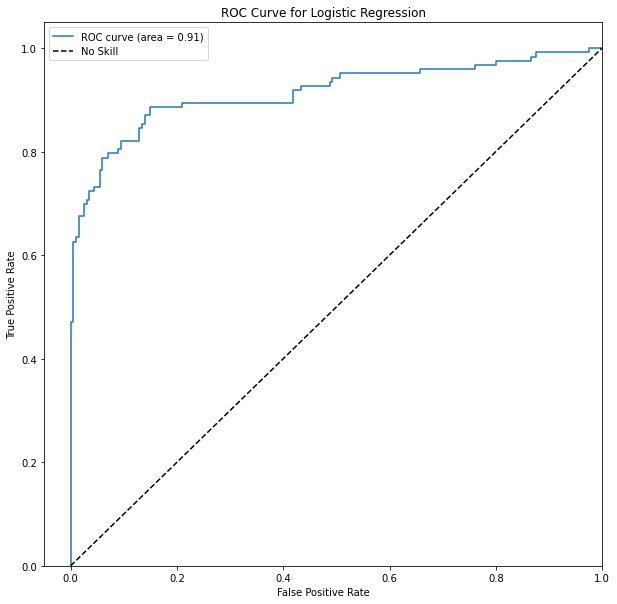

In [1019]:
# Предсказание вероятностей на тестовом наборе данных
y_pred_proba = model_lr.predict_proba(X_test_prep)[:, 1]

# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test_prep, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

А теперь просмотрим матрицу ошибок

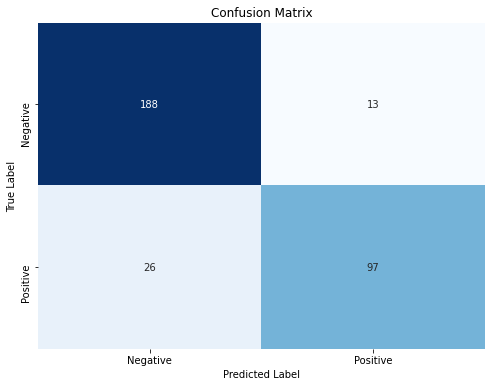

In [1020]:
# Получаем предсказания классов на тестовом наборе данных
y_pred = model_lr.predict(X_test_prep)

# Вычисляем матрицу ошибок
cm = confusion_matrix(y_test_prep, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Все значения для модели в норме, модель не слишком часто ошибается,при этом модель не переобучена. 

### Вывод 

Наилучшей моделью оказалась модель логистической регрессии,наиболее точно показала себя на тестовых данных,roc-auc score на тренировочных данных составил 0.8804477750477749, а на тестовых roc-curve показала 0.91, модель хорошо настроена и готова к использованию.

## Анализ важности признаков

Для того чтобы оценить важность признаков в модели логистической регрессии будем использовать SHAP:

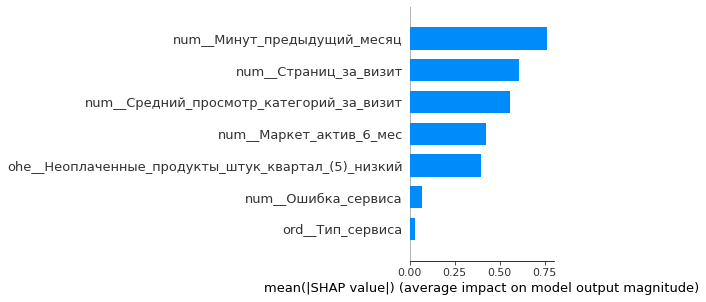

In [1021]:
explainer = shap.LinearExplainer(model_lr, X_train_prep)
shap_values = explainer.shap_values(X_train_prep)
# Визуализация SHAP значений
shap.summary_plot(shap_values, X_train_prep, plot_type="bar")

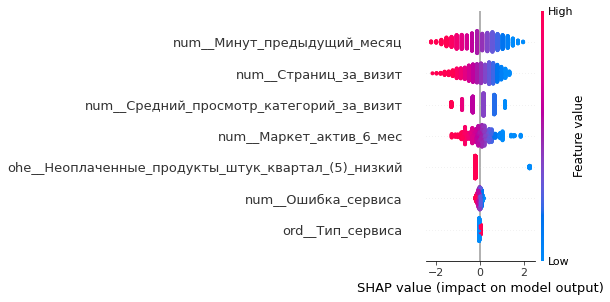

In [1022]:
shap.summary_plot(shap_values, X_train_prep)

**Вывод:**
* Признаки, которые больше всего связаны с активностью клиентов:
    * Количество минут за предыдущий месяц (Связано с тем,что данные за текущий месяц еще просто не сформированы)
    * Средний просмотр категорий за визит (Чем больше пользователь хочет просмотреть, тем больше времени пользователь будет на сайте.
    * Количество просмотренных страниц за визит (Это означает, что пользователи, которые просматривают больше страниц, склонны остаться на сайте)
* Признаки, которые меньше всего связаны с активностью клиентов:
    * Популярная категория (скорее всего человек либо пропустит ее, либо быстро глянет и выйдет от туда)
    * Ошибка сервиса (клиентов могут раздражать какие то непредвиденные ошибки самого сервиса и после клиент может просто выйти оттуда)
    * Вуручка за текущий месяц(Не оказывает никакого влияния, так как напрямую данная информация клиенту не нужна)
* Для повышения общей активности пользователей можно рассмотреть следующие рекомендации:
    * Инвестировать значительные ресурсы в улучшение рекомендательной системы, чтобы пользователи, которые просто просматривают сайт, начали совершать покупки.
    * Внедрить систему скидок и акций для постоянных клиентов, что поможет удержать тех, кто ценит выгодные предложения.
    * Сосредоточиться на привлечении женской аудитории, поскольку активность пользователей в категориях, связанных с красотой, здоровьем и мелкой бытовой техникой, достаточно высока.    

 ## Сегментация пользователей

Рассмотрим, какие признаки влияют на прибыльность клиентов для компании. Для этого объединим датасеты и построим матрицу корреляции:

In [1023]:
profit_df = market_new_df.merge(money, on='id')

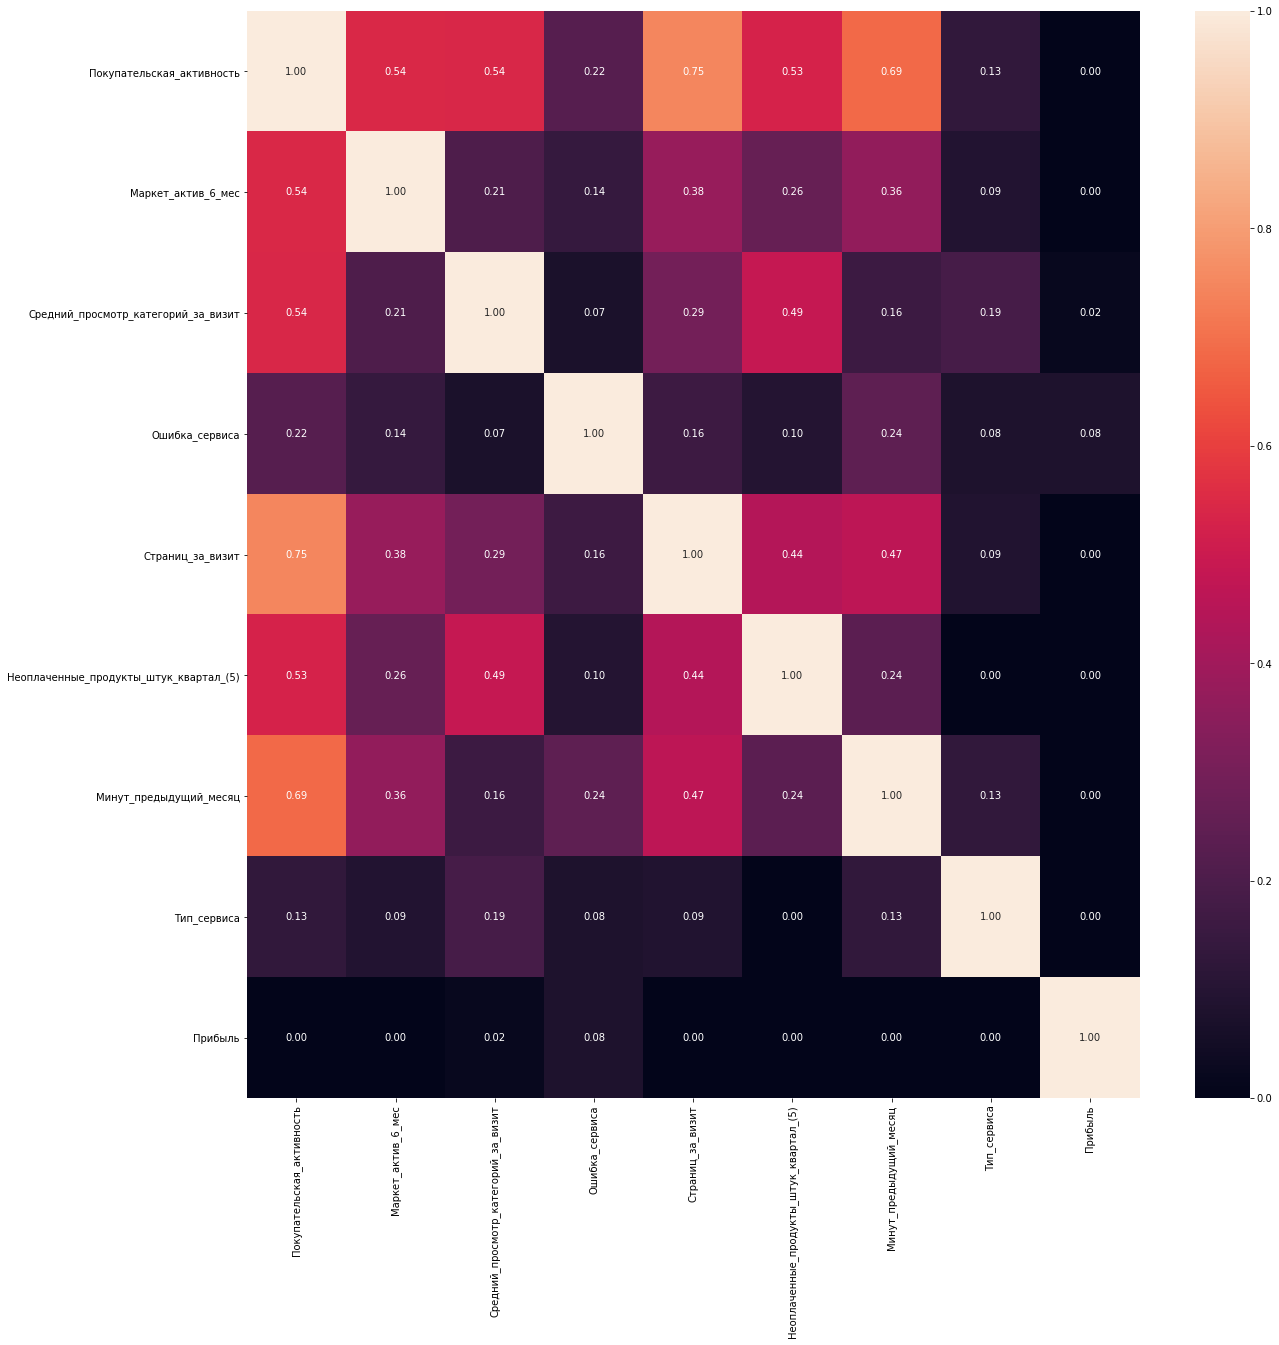

In [1024]:
interval_cols = {
    'Маркет_актив_6_мес',
    'Минут_предыдущий_месяц',
    'Прибыль'
}
plt.figure(figsize=(20, 20))

sns.heatmap(
    profit_df.drop('id', axis=1).phik_matrix(
        interval_cols=interval_cols
    ), annot=True, fmt='.2f'
)

plt.show()

По коэффицентам корреляции, можно сказать что прибыль зависит от ошибок сервиса, популярной категории и среднего просмотра категорий за визит.

В данном случае про данную категорию пользователей можно сказать, что их активность может уменьшится по нескольким причинам и самые распространенные из них: 
* большое количество маркетинговых взаимодействий
* большое количество акционных покупок служит маркером снижения активности в дальнейшем (возможно, это приходящий пользователь, закупившийся по акции,как и говорили ранее)
* ошибки сервиса отпугивает клиентов
* малое количество времени, проводимого на сайте, способствует потере клиента
* низкое количество категорий, просматриваемых за визит, увеличивает вероятность потери клиента (возможно, пользователь не просматривает весь ассортимент и покидает сайт)

Советы бизнесу:
* Уменьшить количество ошибок на сайте
* Попробовать менее агрессивную маркетинговую стратегию
* С помощью каких либо акций или баннеров переводить пользователя в другую категорию
* При этом уменьшить количество акций
* Сделать упор либо на товары для дома, либо на товары для женщин

## Итоговый вывод:
* Загрузили и проверили данные
* Выполнили предобработку данных:
    * Поменяли названия столбцов
    * Изменили тип данных для столбцов датафреймов
    * Выявили неявные дубликаты и устранили их
* Выполнили исследовательский анализ данных:
    * Датафрейм market_file:
        * Маркет_актив_6_мес: можно предположить почти равномерное распределение со смещением вправо,проблема в хвостах на графиках, при обучении модели,стоит учесть то, что дисбаланс явный и сильный,средний класс больше иных в несколько раз.
        * Маркет_актив_тек_мес: По графику видим пик у значения 4, оно же и является модой, распределение похоже на нормальное, но при этом есть дисбаланс между значениями 3 и 5. Присутствует дисбаланс классов,также учтем при обучении модели.
        * Длительность; Рапределение похоже на равномерное, по графику ящика с усами все значения находятся в допустимых пределах,такое распределение может быть связано с тем,что каждый день на сайте регистрируется примерно одинакое количество клиентов
        * Акционные покупки: Судя по графикам, в данных дисбаланс,у большинства клиентов доля акционных покупок составляет 0.1-0.4 и 0.8-1, видимо клиенты у которых доля акционных покупок 0,8-1 покупают только один товар и только по акции. Присутствует дисбаланс классов,учтем
        * Средний просмотр категорий за визит: Распределение похоже на нормальное, дисбаланс отсутствует.
        * Неоплаченные продукты штук за квартал: Похоже на равномерное распределение со смещением влево,оставим все как есть,сильный дисбаланс,учтем
        * Ошибки сервиса: Распределение очень похоже на нормальное, с данными все хорошо
        * Страниц за визит: Распределение похоже на нормальное со смещением влево, выбросы отсутствуют.
        * Категориальные признаки(покупательская активность, тип сервиса, разрешить сообщать, популярная категория): Пользователи, как правило, дают согласие на получение информации об акциях, отдают предпочтение домашнему текстилю и товарам для детей, а также используют стандартную версию сервиса. Основной вывод из графиков заключается в том, что необходимо уделить особое внимание дисбалансу классов целевого признака, связанного с покупательской активностью.
    * Датафрейм market_time:
        *  Минут: Распределение нормальное,значения находятся в пределах нормы
        *  Период: Данные также представлены в одинаковом количестве
    * Датафрейм market_money:
        *  Минут:Имеется выброс у нуля,но также можно сказать что есть клиенты, которые зарегистрировались на сайте, но не купили ничего.
        *  Период: Можно сделать выводы, что данные представлены за каждый месяц в одинаковым размером.
    * Датафрейм money:
        *  Прибыль: Распределение похоже на нормально, с данными все хорошо.
    * Отобрали активных пользователей: Отобрали клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период
* Объединили таблицы
* Провели корреляционный анализ данных: 
    * Было установлено, что существует группа клиентов, которые посещают сайт, долго его просматривают и добавляют товары в корзину, но в итоге не оформляют заказ. При этом с такими пользователями осуществляется достаточно частая маркетинговая коммуникация.
    * В ходе корреляционного анализа из датасета были исключены признаки с низкой корреляцией с целевым значением. Также была устранена мультиколлинеарность, и удалены данные, способные вызвать помехи в процессе машинного обучения.
* Использованы пайплайны:
    * Наилучшей моделью оказалась модель логистической регрессии,наиболее точно показала себя на тестовых данных,roc-auc score на тренировочных данных составил 0.8920680341498525, а на тестовых roc-curve показала 0.92, модель хорошо настроена и готова к использованию.
* Произведен анализ важности признаков:
    * Признаки, которые больше всего связаны с активностью клиентов:
        * Количество минут за предыдущий месяц (Связано с тем,что данные за текущий месяц еще просто не сформированы)
        * Средний просмотр категорий за визит (Чем больше пользователь хочет просмотреть, тем больше времени пользователь будет на сайте.
        * Количество просмотренных страниц за визит (Это означает, что пользователи, которые просматривают больше страниц, склонны остаться на сайте)
    * Признаки, которые меньше всего связаны с активностью клиентов:
        * Популярная категория (скорее всего человек либо пропустит ее, либо быстро глянет и выйдет от туда)
        * Ошибка сервиса (клиентов могут раздражать какие то непредвиденные ошибки самого сервиса и после клиент может просто выйти оттуда)
        * Вуручка за текущий месяц(Не оказывает никакого влияния, так как напрямую данная информация клиенту не нужна)
    * Для повышения общей активности пользователей можно рассмотреть следующие рекомендации:
        * Инвестировать значительные ресурсы в улучшение рекомендательной системы, чтобы пользователи, которые просто просматривают сайт, начали совершать покупки.
        * Внедрить систему скидок и акций для постоянных клиентов, что поможет удержать тех, кто ценит выгодные предложения.
        * Сосредоточиться на привлечении женской аудитории, поскольку активность пользователей в категориях, связанных с красотой, здоровьем и мелкой бытовой техникой, достаточно высока.
* Проведена сегментация пользователей:
    * активность может уменьшится по нескольким причинам и самые распространенные из них: 
        * большое количество маркетинговых взаимодействий
        * большое количество акционных покупок служит маркером снижения активности в дальнейшем (возможно, это приходящий пользователь, закупившийся по акции,как и говорили ранее)
        * ошибки сервиса отпугивает клиентов
        * малое количество времени, проводимого на сайте, способствует потере клиента
        * низкое количество категорий, просматриваемых за визит, увеличивает вероятность потери клиента (возможно, пользователь не просматривает весь ассортимент и покидает сайт)
* Даны предложения бизнесу:
    * Уменьшить количество ошибок на сайте
    * Попробовать менее агрессивную маркетинговую стратегию
    * С помощью каких либо акций или баннеров переводить пользователя в другую категорию
    * При этом уменьшить количество акций
    * Сделать упор либо на товары для дома, либо на товары для женщин
    